In [1]:
from sweep_utils import *

In [2]:
param_configs = "../param_configs/adamw_classic_kq_all_lr_l1_all_layers.json"
script_name = "../scripts/run_fineweb1B_adamw_classic.sh"

df, _ = load_sweep_jsons(param_configs, script_name)

In [3]:
df[:3]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,lr,model,wd
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.486542,4.476774,4.476774,32.25,26.375,25.334298,0.0001,gpt-small-l1-all-softcap,0.0
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.724310,3.711255,3.711255,50.00,50.000,49.186934,0.005,gpt-small-l1-all-softcap,0.0
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,17.976950,18.027599,18.027599,50.00,50.000,49.929925,0.5,gpt-small-l1-all-softcap,0.0


In [4]:
df[df["lr"].isin(['0.1', '0.5', '1.0'])][["model", "min_val_loss", "kq_max", "lr"]]

,model,min_val_loss,kq_max,lr
2,gpt-small-l1-all-softcap,18.027599,5.000000e+01,0.5
6,gpt-small-l1-all-softcap,5.809231,5.000000e+01,0.1
7,gpt-small-l1-all-softcap,81.825943,5.000000e+01,1.0
11,gpt-small-l1-all-lnorm,14.857823,2.544000e+03,0.5
15,gpt-small-l1-all-lnorm,3.954496,8.750000e+01,0.1
16,gpt-small-l1-all-lnorm,93.789612,3.408000e+03,1.0
20,gpt-small-l1-all-w-clip,13.958503,2.342400e+04,0.5
24,gpt-small-l1-all-w-clip,4.169876,3.472000e+03,0.1
25,gpt-small-l1-all-w-clip,74.555542,1.710080e+05,1.0
29,gpt-small-l1-all-default,13.578584,8.697309e+10,0.5


(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

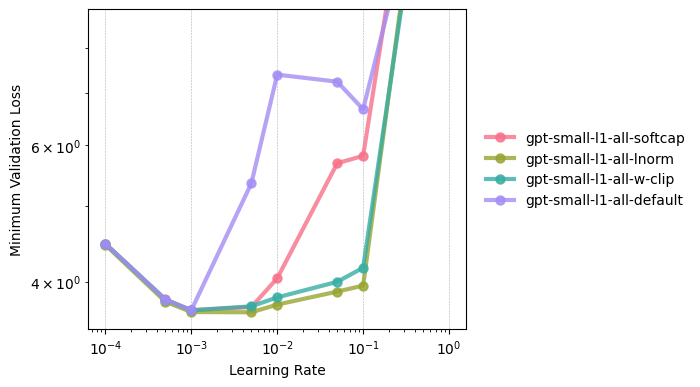

In [5]:
plot_lr_sweep_over_models(df, ycol="min_val_loss", ylog=True, ylim=(3.9, 8.))

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Maximum KQ Value'>)

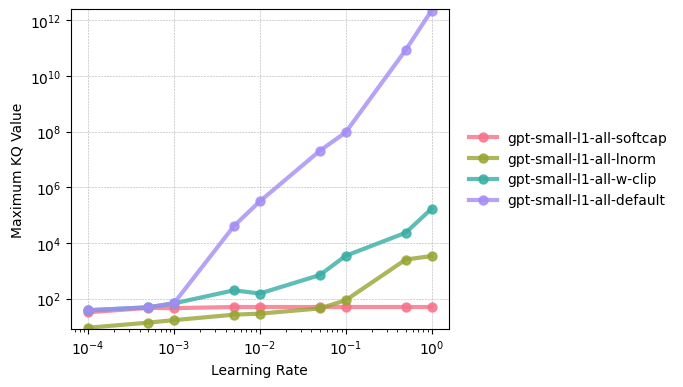

In [6]:
plot_lr_sweep_over_models(df, ycol="kq_max", ylog=True)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

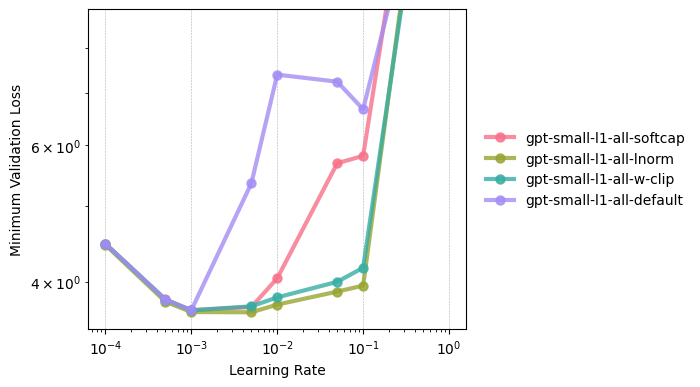

In [12]:
plot_lr_sweep_over_models(df[df["model"].isin(['gpt-small-l1-all-softcap', 'gpt-small-l1-all-lnorm', 'gpt-small-l1-all-w-clip', 
                                               'gpt-small-l1-all-default'])], ycol="min_val_loss", ylog=True, ylim=(3.9, 8.))

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Maximum KQ Value'>)

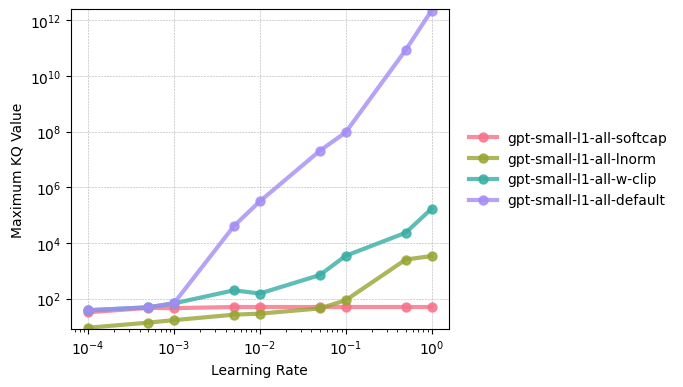

In [13]:
plot_lr_sweep_over_models(df[df["model"].isin(['gpt-small-l1-all-softcap', 'gpt-small-l1-all-lnorm', 'gpt-small-l1-all-w-clip', 
                                               'gpt-small-l1-all-default'])], ycol="kq_max", ylog=True)

In [14]:
df.loc[df["min_val_loss"].idxmin()].to_frame().T[["model", "min_val_loss", "kq_max", "lr"]]

,model,min_val_loss,kq_max,lr
10,gpt-small-l1-all-lnorm,3.653803,26.5,0.005


In [15]:
models = ['gpt-small-l1-all-softcap', 'gpt-small-l1-all-lnorm', 'gpt-small-l1-all-w-clip', 'gpt-small-l1-all-default']

sub = df[df["model"].isin(models)]
best_per_model = sub.loc[sub.groupby("model")["min_val_loss"].idxmin(), ["model", "min_val_loss", "kq_max", "lr"]]
best_per_model

,model,min_val_loss,kq_max,lr
35,gpt-small-l1-all-default,3.675405,67.5,0.001
10,gpt-small-l1-all-lnorm,3.653803,26.5,0.005
8,gpt-small-l1-all-softcap,3.675147,45.5,0.001
26,gpt-small-l1-all-w-clip,3.675405,67.5,0.001


0.06235449390351519